Filipe Pierri de Mendonça Nobre - 118033026

In [42]:
using Plots

In [43]:
using LinearAlgebra

In [44]:
function bissecao(f,a,b,erro) 
  if (f(a)==0)  #verifica se a é raiz da equação
      return a
  end
  if (f(b)==0)  #verifica se b é raiz da equação
      return b
  end
  if !(f(a)*f(b) < 0)
      return "Não tem sinais opostos" #autoexplicativo
  end
  
  it = floor(log2((b-a)/(erro)))+1
    
  for i=1:it
      m=(a+b)/2

      if (f(m)==0) #verifica se m é raiz da equação
          return m
      end
      
      if (f(a)*f(m) < 0) #verifica se os sinais são opostos
          b=m
      else
          a=m
      end
  end
    
  x_final=(a+b)/2
  return x_final, it
end

bissecao (generic function with 1 method)

In [45]:
function vandermonde(x,y,grau)
  n,=size(y)
  V=zeros(n,grau+1)
  for i=1:n #linhas
      for j=1:(grau+1)
          V[i,j]=x[i]^(j-1)
      end
  end
  return V
end

vandermonde (generic function with 1 method)

In [46]:
function interpola_vandermonde(pontos)
  dim = size(pontos)[2] 
  V = zeros(Float64, dim, dim)
  
  for l=1:dim #linhas
      x = 1 
      
      for c=1:dim #colunas
          V[l, c] = x #insere o valor de x
          x *= pontos[1, l] #multiplica x pela linha atual
      end
  end

  return V\pontos[2, :] #resolve o sistema
end

interpola_vandermonde (generic function with 1 method)

In [47]:
function avalia_polinomio(polinomio, x) #monta o polinômio e testa naquele ponto
  i = length(polinomio)
  valor = 0.0
  
  while i > 0
      valor *= x
      valor += polinomio[i]
      i -= 1
  end

  return valor
end

avalia_polinomio (generic function with 1 method)

### 1.1

Fiz por Método de Newton na semana passada, então escolhi os pontos 1, 4 e 5.

O método da bisseção é bastante similar ao de Newton na ideia de que ambos são métodos para encontrar zeros de funções. Vou me poupar de explicações exageradas do porque estou escolhendo $e^{x}-3$, apenas dizer que estou usando o método da bisseção com a mesma lógica.

In [48]:
e(x) = (((ℯ)^(x)) - 3)

e (generic function with 1 method)

In [49]:
bissecao(e,1,2,(10^(-3)))

(1.09814453125, 10.0)

Bom, vamos com as questões de interpolação. Nada muito diferente das questões de interpolação passadas. O que vai fazer com que a gente gere polinômios de grau 1 e grau 2 é a quantidade de pontos que passamos para gerar um polinômio. Como sabemos as propriedades de $ln()$, faremos uso delas para determinar os pontos de interpolação. Obviamente, 3 deve estar dentro desse intervalo dos pontos. Utilizei as fórmulas da semana passada para essa questão pois estava mais familiarizado, mas na 1.2 utilizei a fórmula de interpolação da aula 15. Enfim, calculando...

In [50]:
vandermondegrau1 = [
  ℯ ℯ^(1.1);
  1 1.1
]

polinomio1 = interpola_vandermonde(vandermondegrau1)

println(avalia_polinomio(polinomio1, 3))

1.0985427582174205


Erro na interpolação de grau 1:

In [51]:
erro1 = ((-1/((ℯ^(1.1))^2))/2) * (3 - ℯ) * (3 - ℯ^(1.1))
println(abs(erro1))

6.502176694021775e-5


Agora grau 2...

In [52]:
vandermondegrau2 = [
  ℯ ℯ^(1.05) ℯ^(1.1);
  1 1.05 1.1
]

polinomio2 = interpola_vandermonde(vandermondegrau2)

println(avalia_polinomio(polinomio2, 3))

1.09861458845028


Erro na interpolação de grau 2:

In [53]:
erro2 = ((2/((ℯ^(1.05))^3))/6) * (3 - ℯ) * (3 - ℯ^(1.05)) * (3 - ℯ^(1.1))
println(abs(erro2))

2.386392143745565e-6


### 1.2

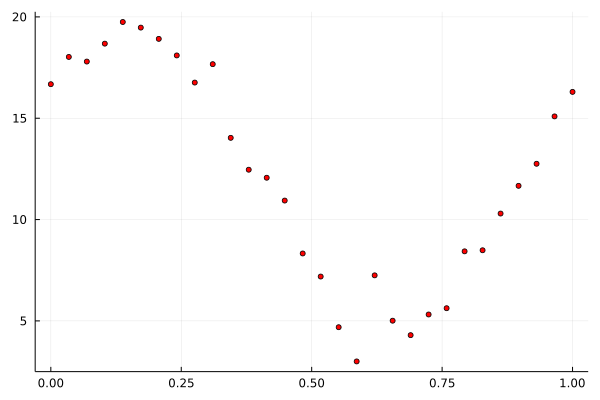

In [81]:
#1
n = 30

using Random

Random.seed!(0)

xPol = range(0, 1, length=n)

ϕ1(x) = sin(2π * x)
ϕ2(x) = cos(2π * x)
ϕ3(x) = 1


yPol = 6 * ϕ1.(xPol) + 4 * ϕ2.(xPol) + 12*ϕ3.(xPol) + randn(n)*1 #ruído

scatter(xPol, yPol, c=:red, ms=3, leg=false)

Gerado com base no conhecimento da aula 15.

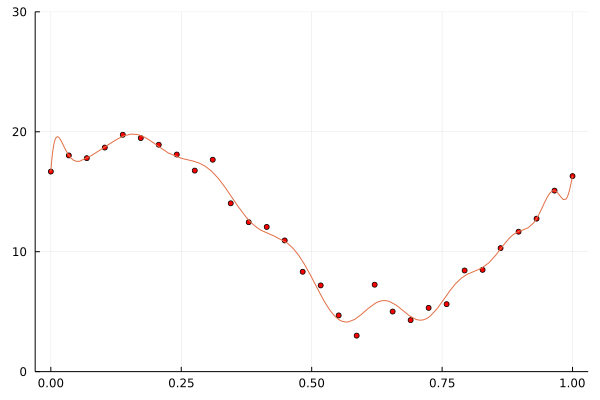

In [102]:
#2
vand = vandermonde(xPol,yPol, 28)
coeficientes = vand\yPol
p(l) = sum(coeficientes[i+1]l^i for i in 0:28)
scatter(xPol, yPol, c=:red, ms=3, leg=false)
plot!(p, ylim=(0,30))


Tem algo estranho que notei com essas interpolações. Até o grau 28, tudo está bem. Mas quando vamos fazer a interpolação com um polinômio de grau 29...

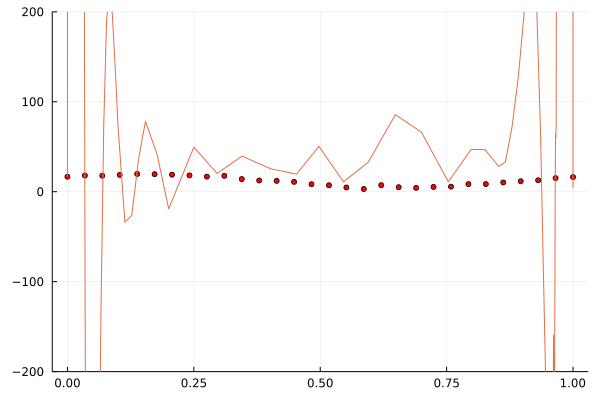

In [103]:
vand = vandermonde(xPol,yPol, 29)
coeficientes = vand\yPol
p(l) = sum(coeficientes[i+1]l^i for i in 0:29)
scatter(xPol, yPol, c=:red, ms=3, leg=false)
plot!(p, ylim=(-200,200))


Regressão até 29 feita. Polinômio bizarro, mas pelo que eu conversei com os colegas de turma, os que me responderam disseram que obtiveram algo parecido.

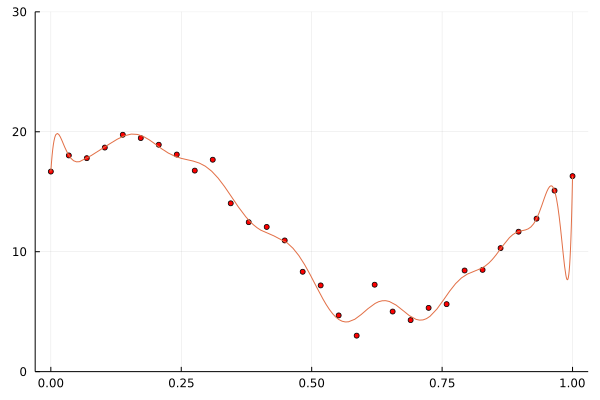

In [96]:
#3
vand = vandermonde(xPol,yPol, 30)
coeficientes = vand\yPol
p(l) = sum(coeficientes[i+1]l^i for i in 0:30)
scatter(xPol, yPol, c=:red, ms=3, leg=false)
plot!(p, ylim=(0,30))

Bom, eu consegui... O Julia está normal, acredito eu.

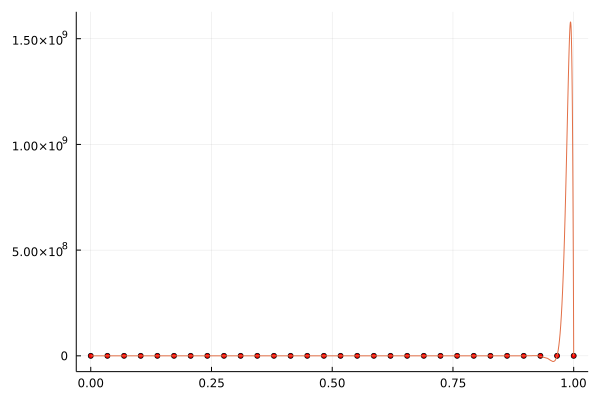

In [99]:
vand = vandermonde(xPol,yPol, 100)
coeficientes = vand\yPol
p(l) = sum(coeficientes[i+1]l^i for i in 0:100)
scatter(xPol, yPol, c=:red, ms=3, leg=false)
plot!(p)

Ok ok, após alguns testes com graus aleatórios eu vejo que o Júlia enlouquece de vez. Creio que o 30 tenha sido sorte.

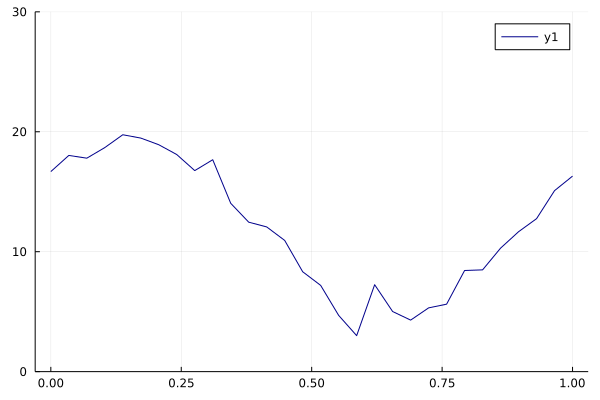

In [92]:
#4
plot(xPol, yPol, c=:darkblue, ylim=(0,30))

Quanto mais o grau aumenta (enquanto o Julia colabora), mais a função se parece com esse plot dos pontos, acredito que seja o esperado pois está trabalhando com uma quantidade grande de pontos, logo aumenta a precisão. Algo importante a se notar é quando o Julia deixa de funcionar direito após ter passado o número de pontos que geramos, o que possui correlação direta.

### 1.3

Com base na aula 14, eu montei um grafo com pesos, onde cada aresta representa a diferença de votos da votação para cada filme (que são os vértices). Para facilitar a compreensão do grafo, a aresta terá peso positivo se o filme com menos votos estiver no vértice esquerdo ligado a aresta, e negativo se for o direito. Após isso, montei uma matriz representando essa votação, para assim resolver por meio de mínimos quadrados. A última linha da matriz é para dar um valor para alguma das variáveis de x e assim descobrir qual tem a "nota" maior, assim achando o filme favorito da turma.

![grafo](https://i.imgur.com/3sFC4TWh.jpg)

$$\begin{vmatrix} 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & -1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & -1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & 0 \\ 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 \\ 0 & -1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 1 & 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 & 0 & -1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & -1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 1 & 0 & -1 & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & 0 \\ 0 & 0 & 0 & -1 & 1 & 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \end{vmatrix} \cdot \begin{vmatrix} Toy \ Story \\ Rocky \\ De \ Volta \ Para \ o \ Futuro \\ Ferris \ Bueller's \ Day \ Off \\ Os \ Incriveis \\ Duna \\ Batman \ Begins \\ Harry \ Potter \ e \ a \ Pedra \ Filosofal \\ Shrek \end{vmatrix} = \begin{vmatrix} 11 \\ 3 \\ 7 \\ 2 \\ 9 \\ 7 \\ 5 \\ 5 \\ 2 \\ 2 \\ 11 \\ 5 \\ 3 \\ 7 \\ 10 \end{vmatrix}$$

In [56]:
using LinearAlgebra

matriz = [
  1 -1 0 0 0 0 0 0 0;
  0 0 1 -1 0 0 0 0 0;
  0 0 0 0 1 -1 0 0 0;
  0 0 0 0 0 0 1 -1 0;
  0 0 0 0 0 -1 0 0 1;
  0 -1 0 0 0 0 0 1 0;
  1 0 -1 0 0 0 0 0 0;
  0 0 0 0 1 0 0 -1 0;
  0 0 0 1 0 -1 0 0 0;
  0 0 1 0 0 -1 0 0 0;
  0 -1 0 0 0 0 0 0 1;
  0 0 0 0 1 0 -1 0 0;
  1 0 0 0 0 0 -1 0 0;
  0 0 0 -1 1 0 0 0 0;
  1 0 0 0 0 0 0 0 0
]

nota, index = findmax(matriz\[11; 3; 7; 2; 9; 7; 5; 5; 2; 2; 11; 5; 3; 7; 10])

println("A turma decidiu que:")

if index == 1
  println("Toy Story é o filme mais querido pelos alunos.")
end

if index == 2
  println("Rocky é o filme mais querido pelos alunos.")
end

if index == 3
  println("De Volta Para o Futuro é o filme mais querido pelos alunos.")
end

if index == 4
  println("Ferris Bueller's Day Off é o filme mais querido pelos alunos.")
end

if index == 5
  println("Os Incriveis é o filme mais querido pelos alunos.")
end

if index == 6
  println("Duna é o filme mais querido pelos alunos.")
end

if index == 7
  println("Batman Begins é o filme mais querido pelos alunos.")
end

if index == 8
  println("Harry Potter e a Pedra Filosofal é o filme mais querido pelos alunos.")
end

if index == 9
  println("Shrek é o filme mais querido pelos alunos.")
end

A turma decidiu que:
Shrek é o filme mais querido pelos alunos.


### 1.4

Coloquei os número de dias e pesos que se passaram como x e y, respectivamente. Após isso, utilizei vandermonde para gerar um polinômio de grau 4 pois achei que a regressão estava mais próxima da função gerada pelos pontos. O resultado é que depois de praticamente 100 dias, João Paixão terá o corpo apaixonante que deseja.

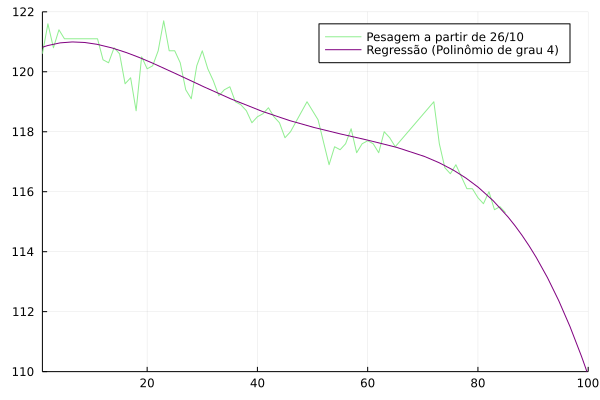

In [87]:
pesos = [
  1	120.6;
  2	121.6;
  3	120.8;
  4	121.4;
  5	121.1;
  11 121.1;
  12 120.4;
  13 120.3;
  14 120.8;
  15 120.6;
  16 119.6;
  17 119.8;
  18 118.7;
  19 120.5;
  20 120.1;
  21 120.2;
  22 120.7;
  23 121.7;
  24 120.7;
  25 120.7;
  26 120.3;
  27 119.4;
  28 119.1;
  29 120.2;
  30 120.7;
  31 120.1;
  32 119.7;
  33 119.2;
  34 119.4;
  35 119.5;
  36 119;
  37 118.9;
  38 118.7;
  39 118.3;
  40 118.5;
  41 118.6;
  42 118.8;
  43 118.5;
  44 118.3;
  45 117.8;
  46 118;
  49 119;
  51 118.4;
  53 116.9;
  54 117.5;
  55 117.4;
  56 117.6;
  57 118.1;
  58 117.3;
  59 117.6;
  60 117.7;
  61 117.6;
  62 117.3;
  63 118;
  64 117.8;
  65 117.5;
  72 119;
  73 117.6;
  74 116.8;
  75 116.6;
  76 116.9;
  78 116.1;
  79 116.1;
  80 115.8;
  81 115.6;
  82 116;
  83 115.4;
  84 115.5;
  85 115.3
]

xdias = pesos[:,1]
ypesos = pesos[:,2]
matrizSistema = vandermonde(xdias,ypesos,4)
coeficientesPeso = matrizSistema\ypesos
f(x) = sum(coeficientesPeso[i+1]x^i for i in 0:4)
h(x) = f(x) - 110

plot(xdias, ypesos, c=:lightgreen, label = "Pesagem a partir de 26/10")
plot!(f, xlim=(1,100), ylim=(110,122), c=:purple, label = "Regressão (Polinômio de grau 4)") #coloquei as cores em homenagem ao EVA-01 pq sim 